## Global Imports

In [1]:
from qiskit.circuit.library import TwoLocal
import random

## Local Imports

In [7]:
from hamiltonians import gen_trans_ising_op, get_exact_ground
from mub_state_gen import generate_all_subsets
from landscape import calculate_energy_landscape, display_energy_landscape, display_energy_histogram, find_k_best_results
from vqe import Parameters, get_standard_params, run_vqe_experiment

## Example: generate operator, calculate landscape, show results

In [8]:
n_qubits = 3
n_mub_qubits = 3

zz_coeff = random.uniform(0,1)
x_coeff = random.uniform(0,1)
op = gen_trans_ising_op(n_qubits, zz_coeff, x_coeff)
ansatz = TwoLocal(3, 'ry', 'cx', 'linear', reps=2, insert_barriers=True).decompose()
zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)
print(zeroset_anastz)
print(f"attempting all MUB states over the operator {op}")
results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), appended_ansatz=zeroset_anastz)
exact_result = get_exact_ground(op)

     ┌───────┐ ░            ░ ┌───────┐ ░            ░ ┌───────┐
q_0: ┤ Ry(0) ├─░───■────────░─┤ Ry(0) ├─░───■────────░─┤ Ry(0) ├
     ├───────┤ ░ ┌─┴─┐      ░ ├───────┤ ░ ┌─┴─┐      ░ ├───────┤
q_1: ┤ Ry(0) ├─░─┤ X ├──■───░─┤ Ry(0) ├─░─┤ X ├──■───░─┤ Ry(0) ├
     ├───────┤ ░ └───┘┌─┴─┐ ░ ├───────┤ ░ └───┘┌─┴─┐ ░ ├───────┤
q_2: ┤ Ry(0) ├─░──────┤ X ├─░─┤ Ry(0) ├─░──────┤ X ├─░─┤ Ry(0) ├
     └───────┘ ░      └───┘ ░ └───────┘ ░      └───┘ ░ └───────┘
attempting all MUB states over the operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.91013993+0.j, 0.91013993+0.j, 0.37847221+0.j, 0.37847221+0.j,
 0.37847221+0.j])


c:\Users\Ittay\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


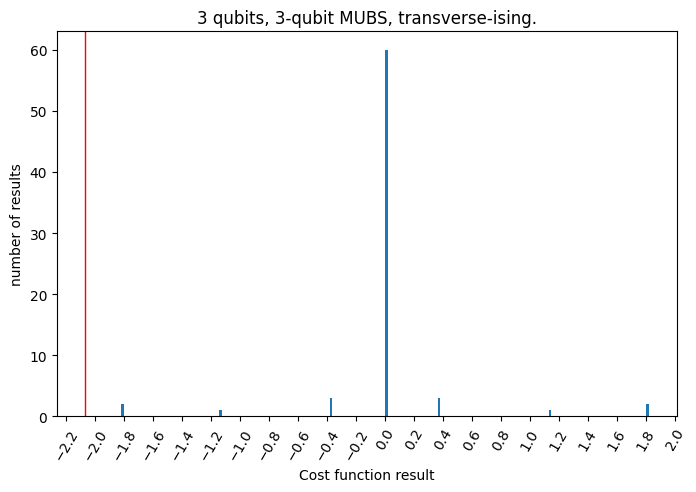

In [9]:
display_energy_histogram(results, exact_result, graph_title=f"{n_qubits} qubits, {n_mub_qubits}-qubit MUBS, transverse-ising.", bins=200)

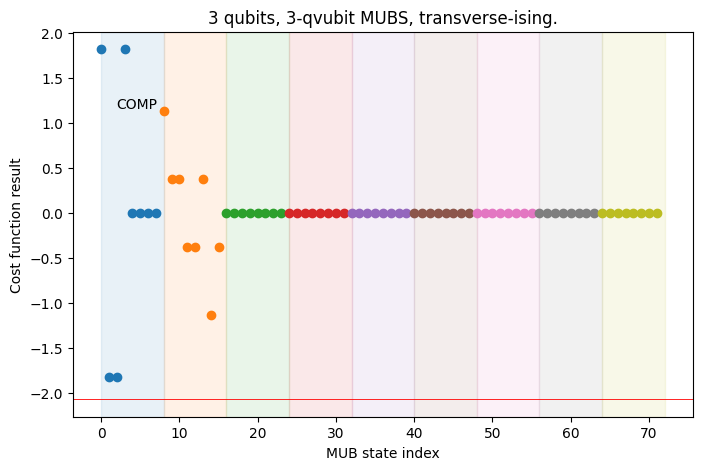

In [10]:
display_energy_landscape(results, exact_result, graph_title=f"{n_qubits} qubits, {n_mub_qubits}-qvubit MUBS, transverse-ising.")

## Convincing results
What results dfo I want o show Tal and Dekel so they'll be convicned that what I did here shows anything?

1.  Show that when genrating 3-qubit full-MUB states using Trasnverse Ising, the best starting points are *clearly* not in the comp. basis.
    Do so by giving 2-3 examples of such generated Hamiltonians.

2.  Show that the rest of the results bunch around a VERY specific area in the cost, perhaps indicating a BP.
    Another, more pessimistic way to see this is that MUBs only give an advantage in a very small number of cases.
    Use the same graphs.

3.  Show that when we do Half-MUBs, the answers drastically drift away from the correct result. However, non-comps still lead to victory.
    Do so by giving 4-5 graphs with increasing qubit count, showing the distinct difference.

In [ ]:
# 3-qubit experiments
n_qubits = 3
n_mub_qubits = 3

for _ in range(3):  # Three examples
    zz_coeff = random.uniform(0,1)
    x_coeff = random.uniform(0,1)
    op = gen_trans_ising_op(n_qubits, zz_coeff, x_coeff)
    print(f"attempting all MUB states over the operator {op}")
    results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits))
    exact_result = get_exact_ground(op)
    print("Energy Landscape:")
    display_energy_landscape(results, exact_result=exact_result)
    print("Energy Histogram:")
    display_energy_histogram(results, exact_result=exact_result)

In [ ]:
# half-MUB experiments
n_mub_qubits = 3
zz_coeff = random.uniform(0,1)
x_coeff = random.uniform(0,1)

for n_qubits in range(4,8):  # Three examples

    op = gen_trans_ising_op(n_qubits, zz_coeff, x_coeff)
    print(f"attempting all MUB states over the operator {op}")
    results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits))
    exact_result = get_exact_ground(op)
    print("Energy Landscape:")
    display_energy_landscape(results, exact_result=exact_result)
    print("Energy Histogram:")
    display_energy_histogram(results, exact_result=exact_result)

### Unified results: partial-MUB with $\ket{0}$ vs. $\ket{+}$
Here, I run the same experiment with a bit less qubits, but use both options forn qubits not involved in the MUB state itself.
1.  Put it in $\ket{0}$, the trivial option.
2.  Put it in $\ket{+}$, the other option Dekel found to be rather successful.

In [ ]:
# half-MUB experiments
n_mub_qubits = 3
zz_coeff = random.uniform(0,1)
x_coeff = random.uniform(0,1)

print("THE ZERO EXPERIMENTS START")
for n_qubits in range(4,7):  # Three examples
    op = gen_trans_ising_op(n_qubits, zz_coeff, x_coeff)
    print(f"attempting all MUB states over the operator {op}")
    print("========ZERO VERSION=========")
    results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits))
    exact_result = get_exact_ground(op)
    print("Energy Landscape:")
    display_energy_landscape(results, exact_result=exact_result)
    print("Energy Histogram:")
    display_energy_histogram(results, exact_result=exact_result)
    print("========PLUS VERSION=========")
    results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), plus_for_non_mub=True)
    exact_result = get_exact_ground(op)
    print("Energy Landscape:")
    display_energy_landscape(results, exact_result=exact_result)
    print("Energy Histogram:")
    display_energy_histogram(results, exact_result=exact_result)
    print("==============END============")


## Combined Example with VQE

In [ ]:
# generate operator
n_qubits = 3
n_mub_qubits = 3
x_coeff = random.uniform(0,1)
zz_coeff = random.uniform(0,1)
op = gen_trans_ising_op(n_qubits, x_coeff, zz_coeff)
exact_result = get_exact_ground(op)

ansatz = TwoLocal(3, ['rx', 'ry', 'rz'], 'cx', 'linear', reps=3, insert_barriers=True).decompose()
zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)

# calculate landscape and graphs
results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), appended_ansatz=zeroset_anastz)
exact_result = get_exact_ground(op)
print("Energy Landscape:")
display_energy_landscape(results, exact_result=exact_result)
print("Energy Histogram:")
display_energy_histogram(results, exact_result=exact_result)

# run VQE from the best 5 examples
params = get_standard_params(n_qubits)
params.success_bound = 1e-2
params.exact_result = exact_result
params.optimizer = 'COBYLA'
params.report_period=100
params.report_thetas=False

print(f"The operator {op} has the exact value {params.exact_result}.")
print(f"Now trying to reach the vcalue from different MUB points.")
for initial_state, value in find_k_best_results(results, 5):
    print(f"running from point with value {value}")
    print(run_vqe_experiment(op, ansatz, initial_state, params))
    

## Convincing results - now with VQE

### 3-qubit experiments

attempting all MUB states over the operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.65502683+0.j, 0.65502683+0.j, 0.0610037 +0.j, 0.0610037 +0.j,
 0.0610037 +0.j])
Energy Landscape:


c:\Users\Ittay\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


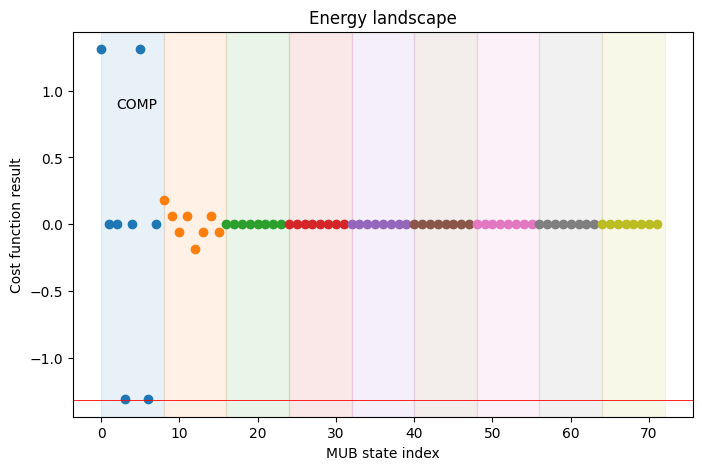

Energy Histogram:


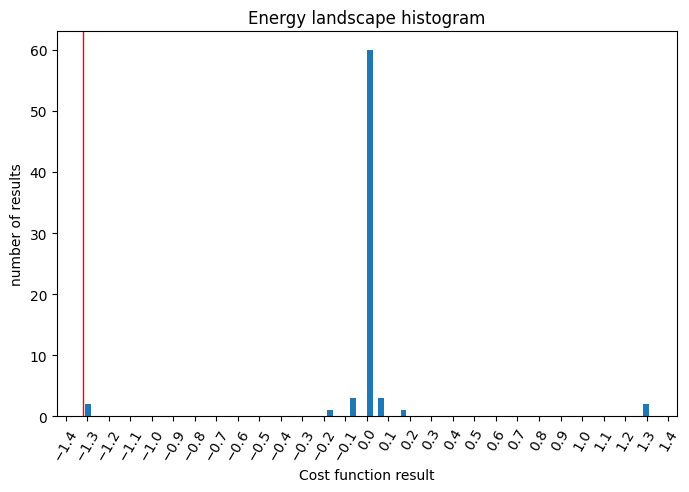

The operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.65502683+0.j, 0.65502683+0.j, 0.0610037 +0.j, 0.0610037 +0.j,
 0.0610037 +0.j]) has the exact value (-1.3176847286320488+0j).
Now trying to reach the vcalue from different MUB points.
running from point with value -1.3100536501
(98, -1.3139874191241538, True)
running from point with value -1.3100536501
(53, -1.3139806036413255, True)
running from point with value -0.1830111114
200: -1.31208276498838
(213, -1.3127892026405144, True)
running from point with value -0.0610037038
200: -1.3110193604201075
(211, -1.312797164021162, True)
running from point with value -0.0610037038
200: -1.308444427909919
(247, -1.312751217110086, True)



=============EXPERIMENT END================


attempting all MUB states over the operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.63439477+0.j, 0.63439477+0.j, 0.68556949+0.j, 0.68556949+0.j,
 0.68556949+0.j])
Energy Landscape:


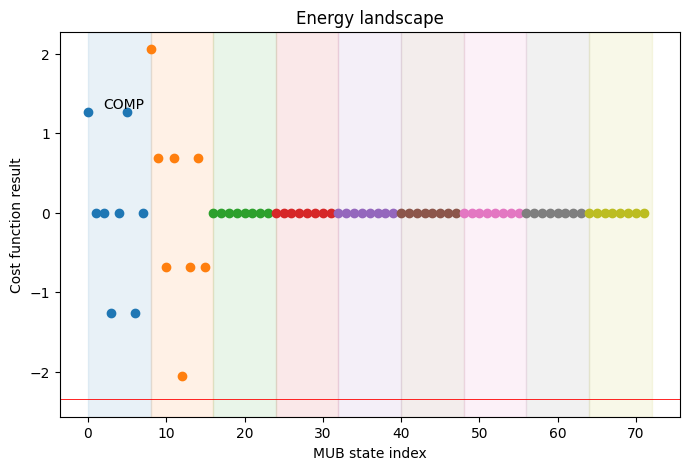

Energy Histogram:


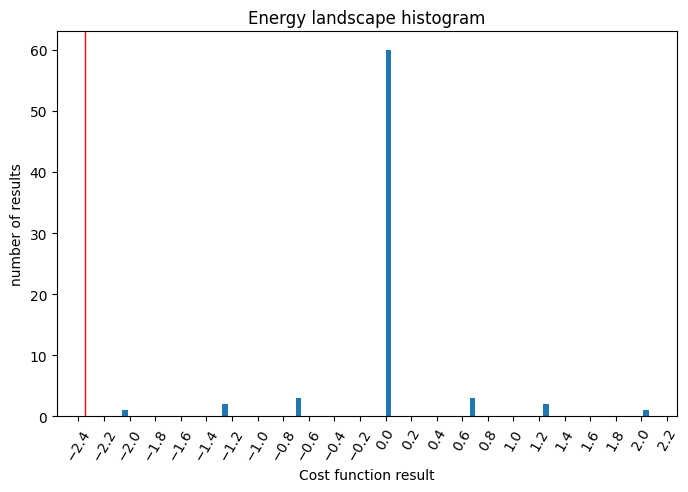

The operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.63439477+0.j, 0.63439477+0.j, 0.68556949+0.j, 0.68556949+0.j,
 0.68556949+0.j]) has the exact value (-2.347529997512445+0j).
Now trying to reach the vcalue from different MUB points.
running from point with value -2.0567084577
(155, -2.342670345581714, True)
running from point with value -1.2687895397
200: -2.3207376092589005
(287, -2.342914173294468, True)
running from point with value -1.2687895397
200: -2.339948829768863
(209, -2.343276957099583, True)
running from point with value -0.6855694859
200: -2.25633901769561
(300, -2.3426208572139293, True)
running from point with value -0.6855694859
200: -2.3357482147757507
(219, -2.343037208717694, True)



=============EXPERIMENT END================


attempting all MUB states over the operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.11703891+0.j, 0.11703891+0.j, 0.72227717+0.j, 0.72227717+0.j,
 0.72227717+0.j])
Ene

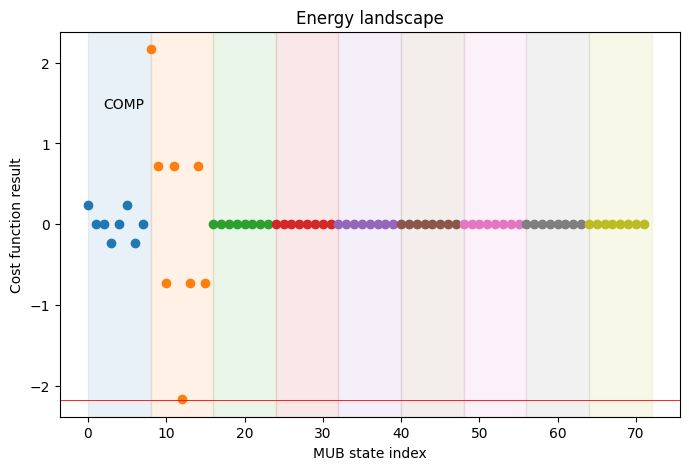

Energy Histogram:


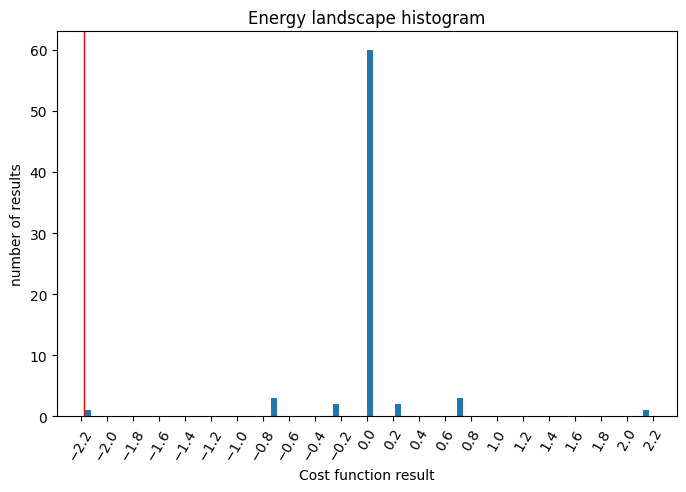

The operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.11703891+0.j, 0.11703891+0.j, 0.72227717+0.j, 0.72227717+0.j,
 0.72227717+0.j]) has the exact value (-2.176313978782521+0j).
Now trying to reach the vcalue from different MUB points.
running from point with value -2.1668314979
(96, -2.171486067711803, True)
running from point with value -0.722277166
200: -2.0939228869701254
(364, -2.171548904938087, True)
running from point with value -0.722277166
200: -2.1654335497013983
(217, -2.1715194543615848, True)
running from point with value -0.722277166
200: -2.167147445737868
(242, -2.1721897314338, True)
running from point with value -0.2340778108
200: -2.1590247709462393
(207, -2.171701774746091, True)



=============EXPERIMENT END================




In [18]:
n_qubits = 3
n_mub_qubits = 3

for _ in range(3):  # Three examples
    zz_coeff = random.uniform(0,1)
    x_coeff = random.uniform(0,1)
    op = gen_trans_ising_op(n_qubits, zz_coeff, x_coeff)

    ansatz = TwoLocal(3, ['rx', 'ry', 'rz'], 'cx', 'linear', reps=3, insert_barriers=True).decompose()
    zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)

    print(f"attempting all MUB states over the operator {op}")
    results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), appended_ansatz=zeroset_anastz)
    exact_result = get_exact_ground(op)
    print("Energy Landscape:")
    display_energy_landscape(results, exact_result=exact_result)
    print("Energy Histogram:")
    display_energy_histogram(results, exact_result=exact_result)

    # run VQE from the best 5 examples
    params = get_standard_params(n_qubits)
    params.exact_result = exact_result
    params.report_period = 200
    params.success_bound = 5e-3

    print(f"The operator {op} has the exact value {params.exact_result}.")
    print(f"Now trying to reach the vcalue from different MUB points.")
    for initial_state, value in find_k_best_results(results, 5):
        print(f"running from point with value {value}")
        print(run_vqe_experiment(op, ansatz, initial_state, params))

    print("\n\n\n=============EXPERIMENT END================\n\n")

In [ ]:
# half-MUB experiments
n_mub_qubits = 3
zz_coeff = random.uniform(0,1)
x_coeff = random.uniform(0,1)

for n_qubits in range(4,8):  # Three examples

    op = gen_trans_ising_op(n_qubits, zz_coeff, x_coeff)
    print(f"attempting all MUB states over the operator {op}")
    results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits))
    exact_result = get_exact_ground(op)
    print("Energy Landscape:")
    display_energy_landscape(results, exact_result=exact_result)
    print("Energy Histogram:")
    display_energy_histogram(results, exact_result=exact_result)